In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
# Ścieżki do folderów
max_pooling_path = 'MaxPooling2D'
double_max_pooling_path = 'Double_MaxPooling2D'
dense_path = 'Dense'

# Wczytanie plików history.csv do obiektów
max_pooling_histories = {}
double_max_pooling_histories = {}
dense_histories = {}

In [7]:
# Funkcja do wczytywania pliku history.csv
def load_history(file_path):
    df = pd.read_csv(file_path)
    return df

# Wczytywanie plików history.csv dla MaxPooling2D
for folder_name in os.listdir(max_pooling_path):
    folder_path = os.path.join(max_pooling_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            max_pooling_histories[folder_name] = history

# Wczytywanie plików history.csv dla DoubleMaxPooling2D
for folder_name in os.listdir(double_max_pooling_path):
    folder_path = os.path.join(double_max_pooling_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            double_max_pooling_histories[folder_name] = history

# Wczytywanie plików history.csv dla Dense
for folder_name in os.listdir(dense_path):
    folder_path = os.path.join(dense_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            dense_histories[folder_name] = history


In [ ]:
print("Historia dla MaxPooling2D")
for folder_name, history in max_pooling_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

print("Historia dla DoubleMaxPooling2D")
for folder_name, history in double_max_pooling_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

print("Historia dla Dense")
for folder_name, history in dense_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

In [26]:
def plot_metric_for_objects(name, histories, metric_name):
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))

    # Sortowanie kluczy
    sorted_sizes = sorted(histories.keys(), key=int)

    for size in sorted_sizes:
        history = histories[size]
        epochs = history['Epoch']
        metric_values = history[metric_name]

        # Wykres
        ax.plot(epochs, metric_values, label=f"Size {size}")

    # Dodanie legendy, tytułu i etykiet osi
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Metric: {metric_name} for {name}')

    # Wyświetlanie wykresu
    plt.show()


In [24]:
metric_name = ["Loss",
               "Accuracy",
               "MSE",
               "VAL_MSE",
               "PSNR",
               "VAL_PSNR",
               "MAE"]

histories = {
    'Dense': dense_histories,
    'Max Pooling': max_pooling_histories,
    'Double Max Pooling': double_max_pooling_histories
}

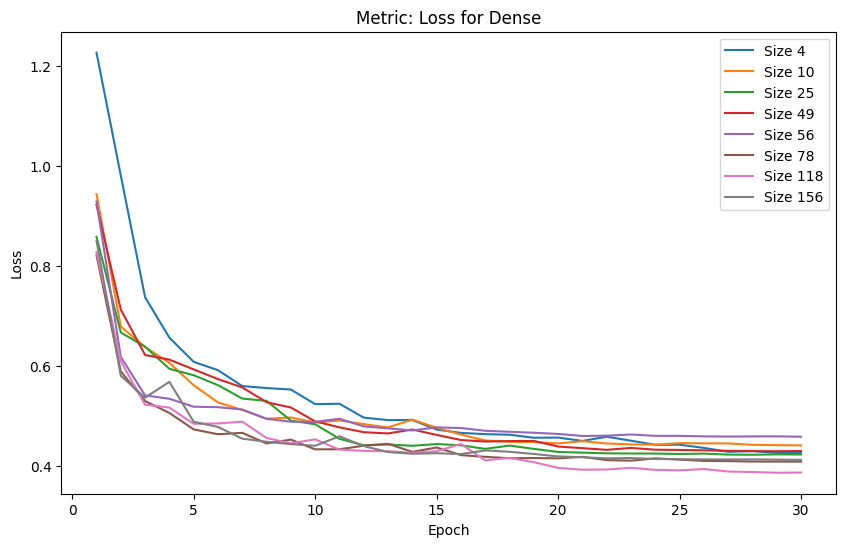

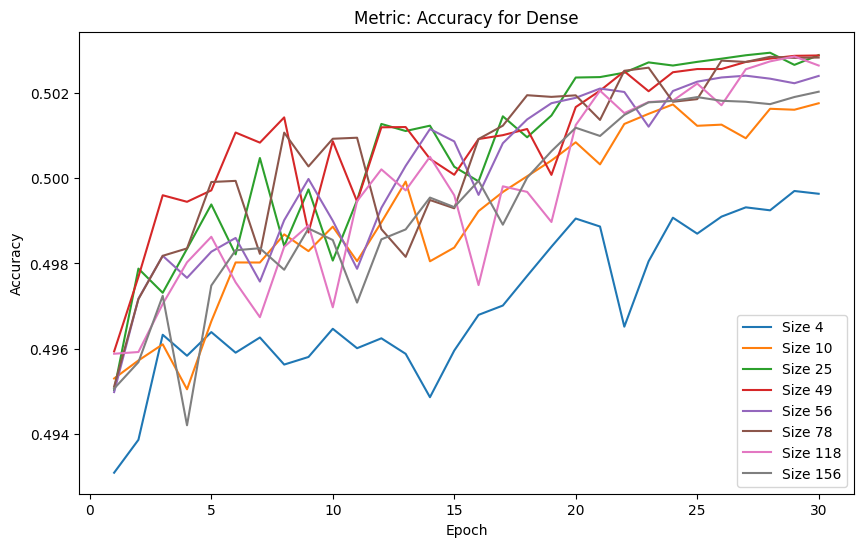

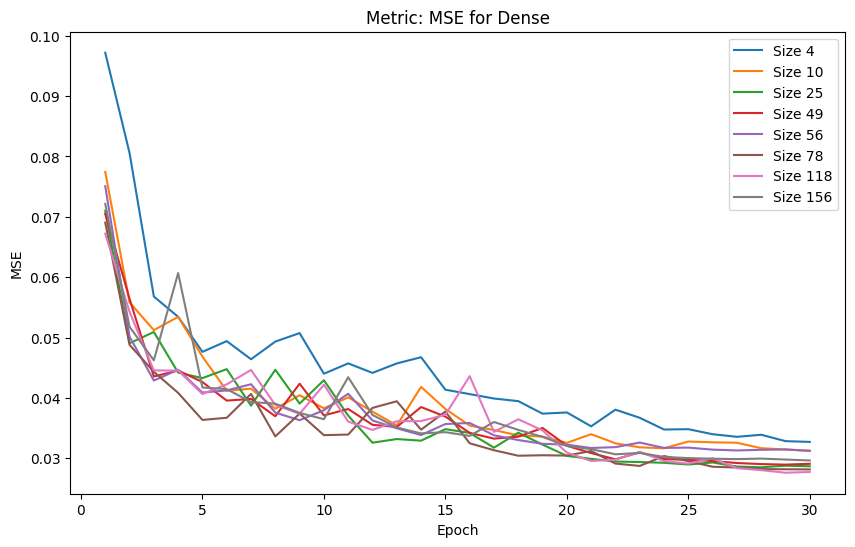

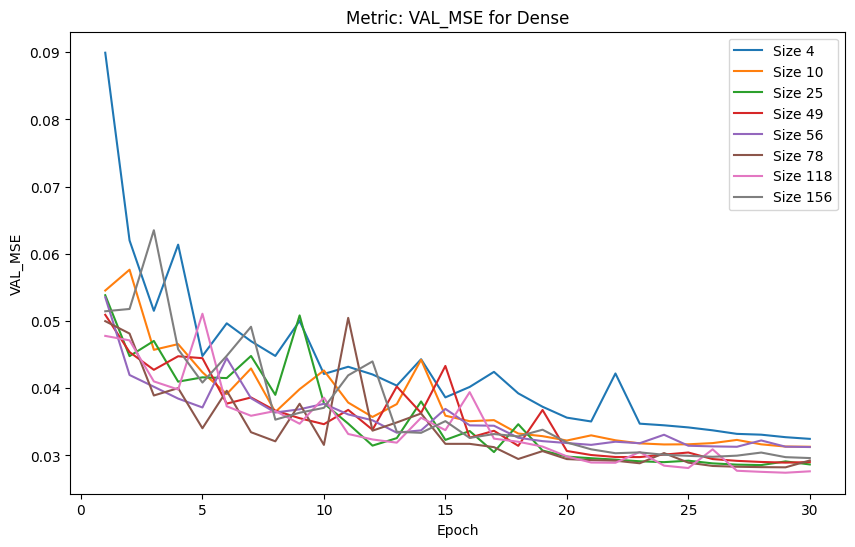

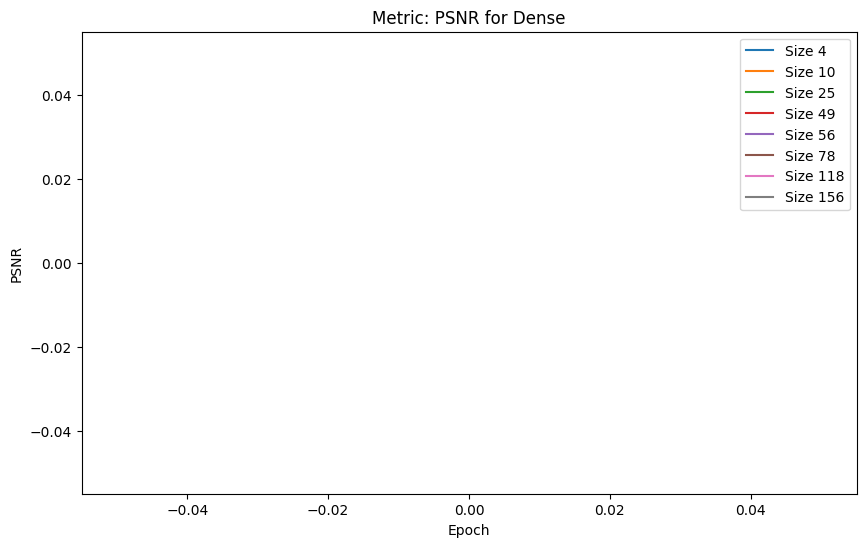

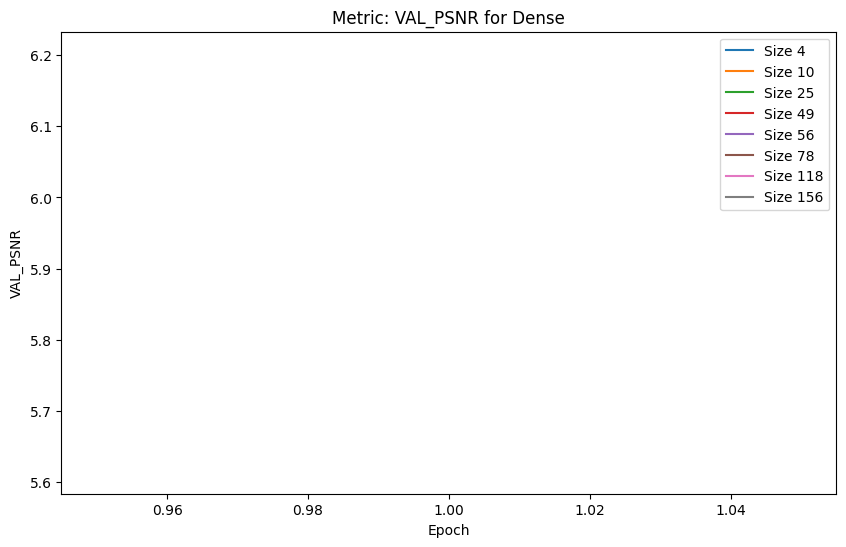

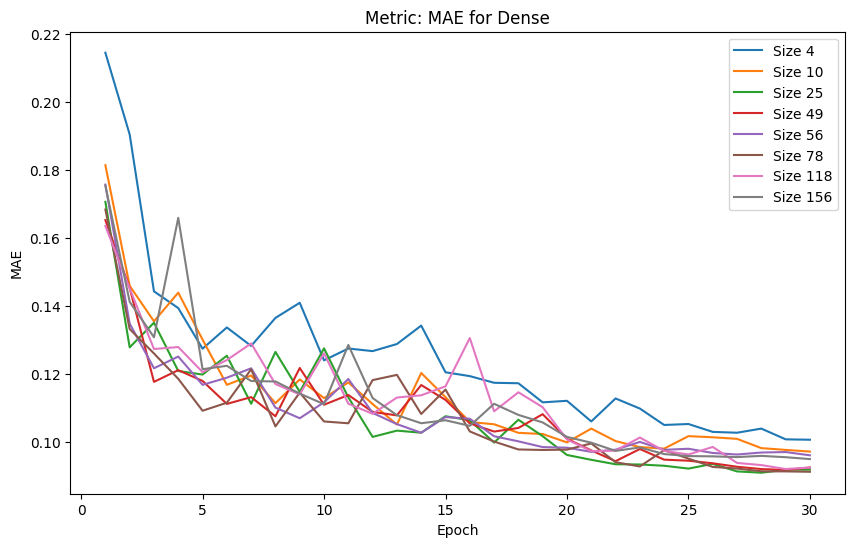

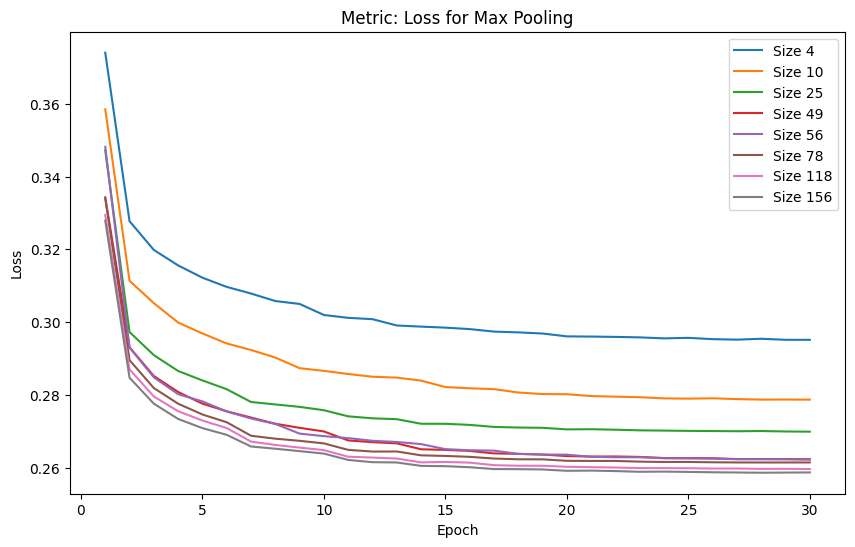

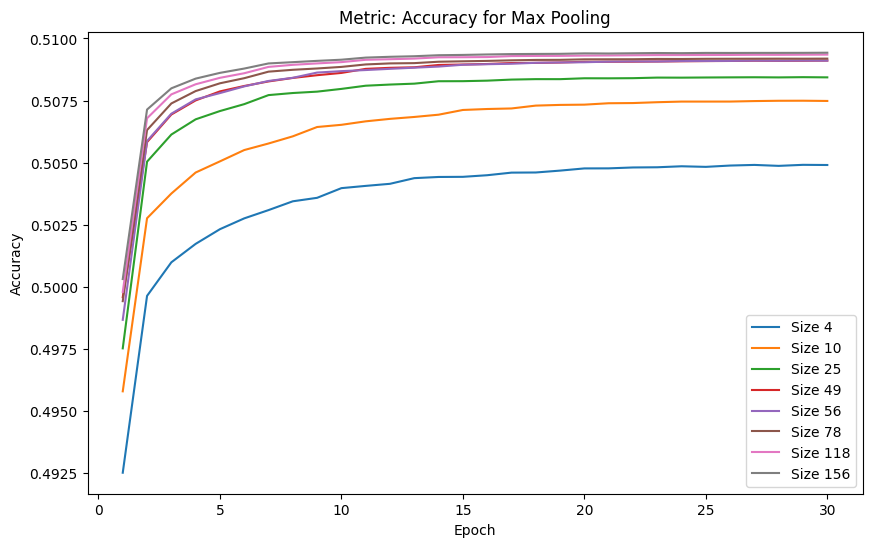

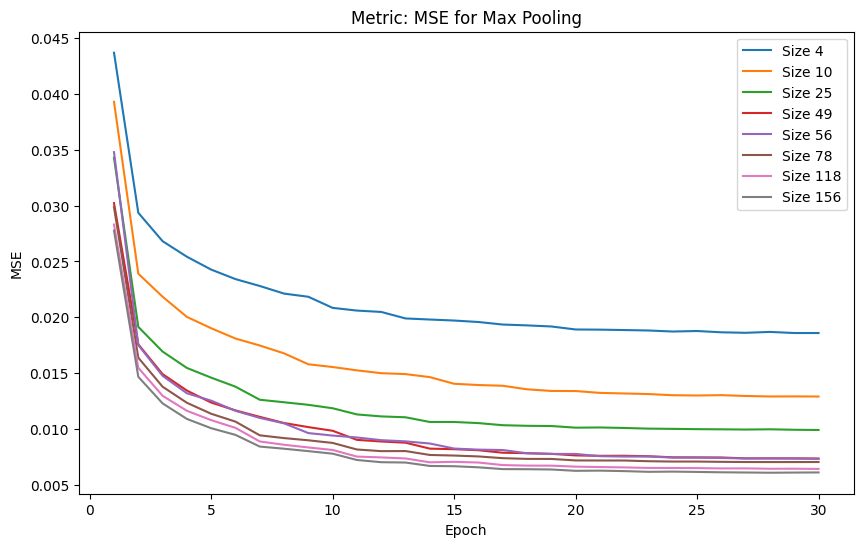

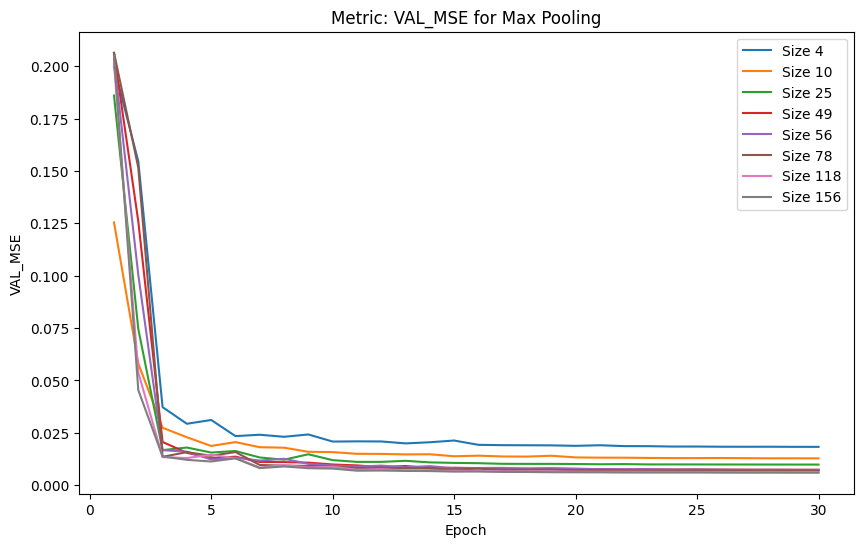

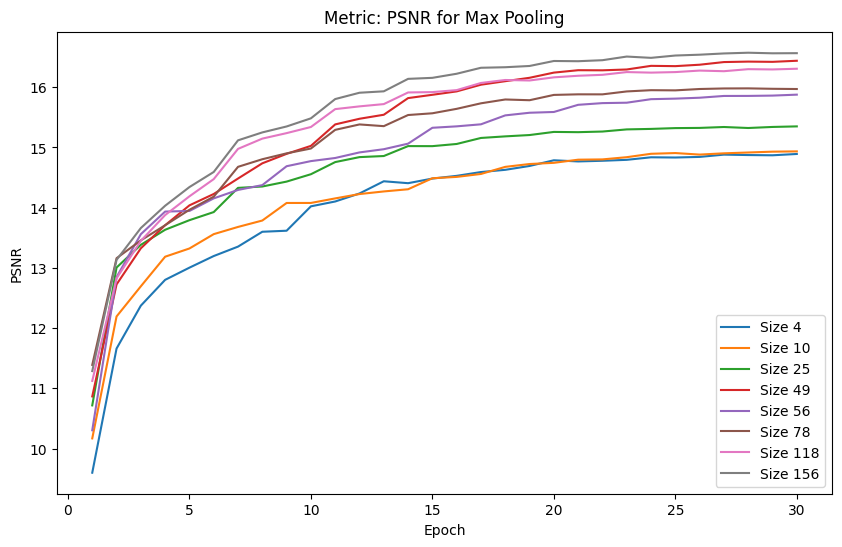

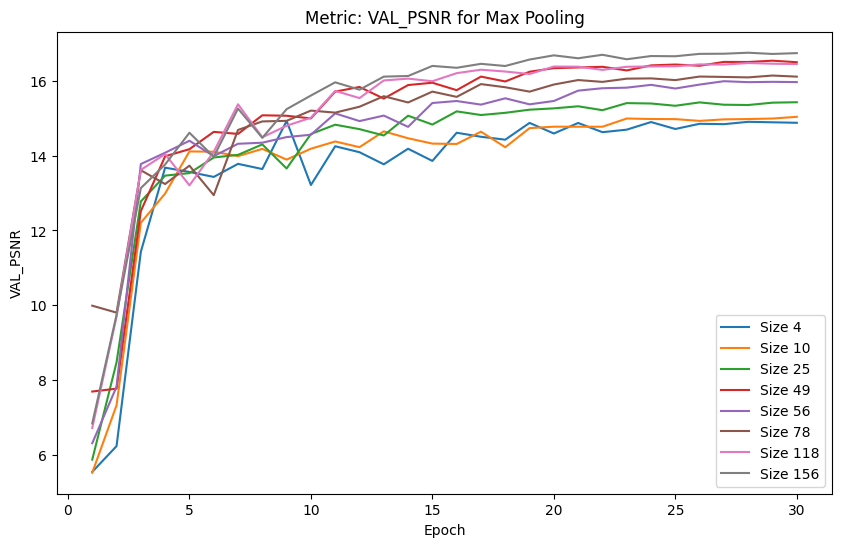

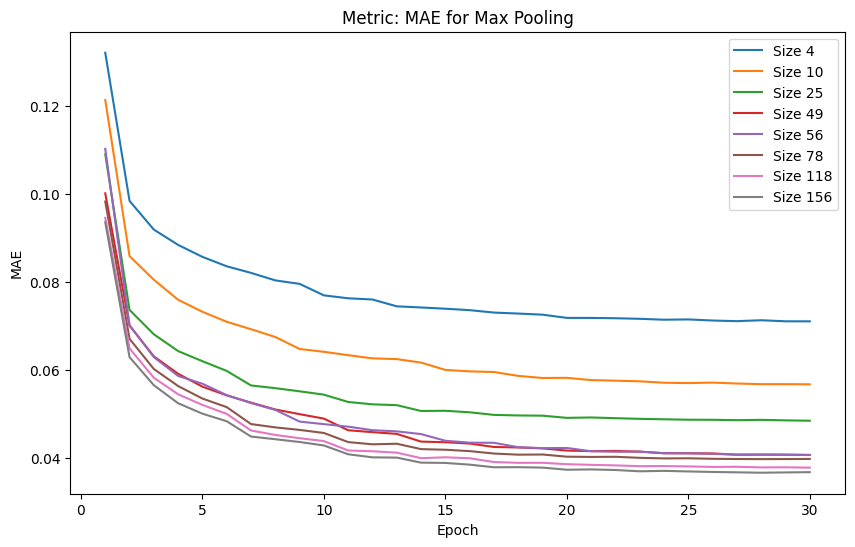

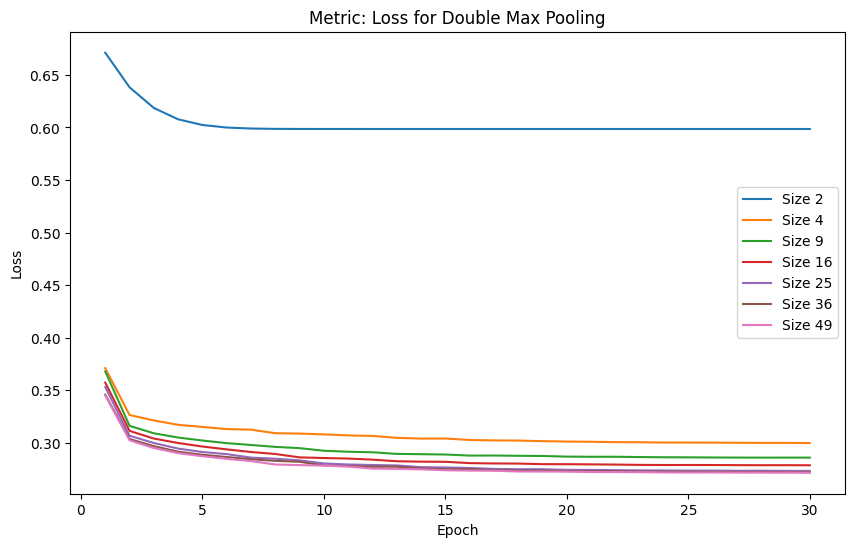

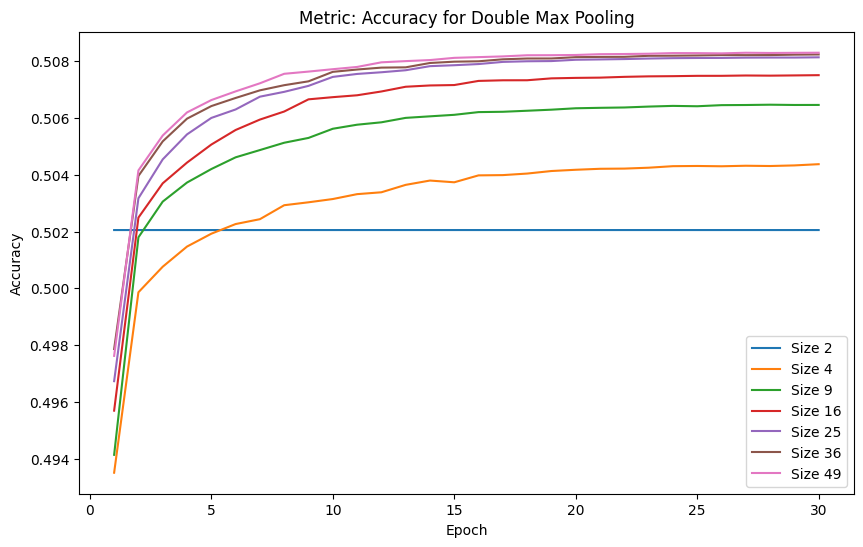

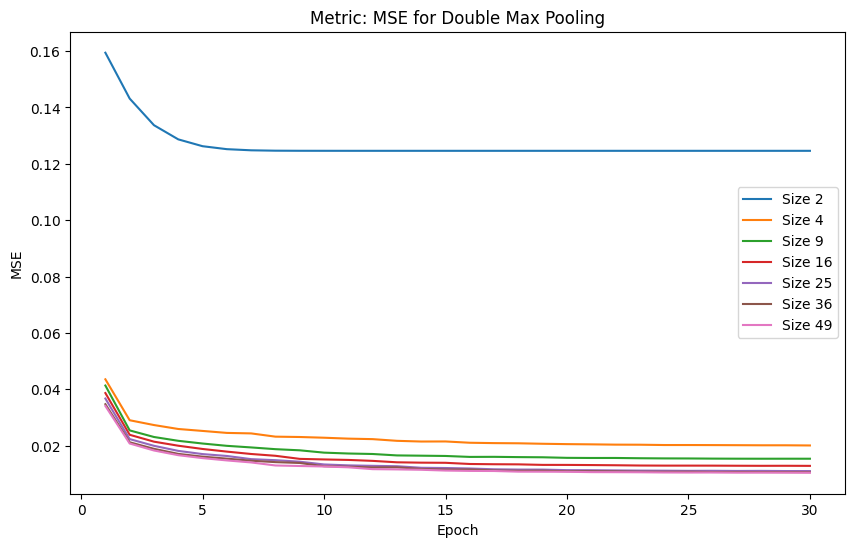

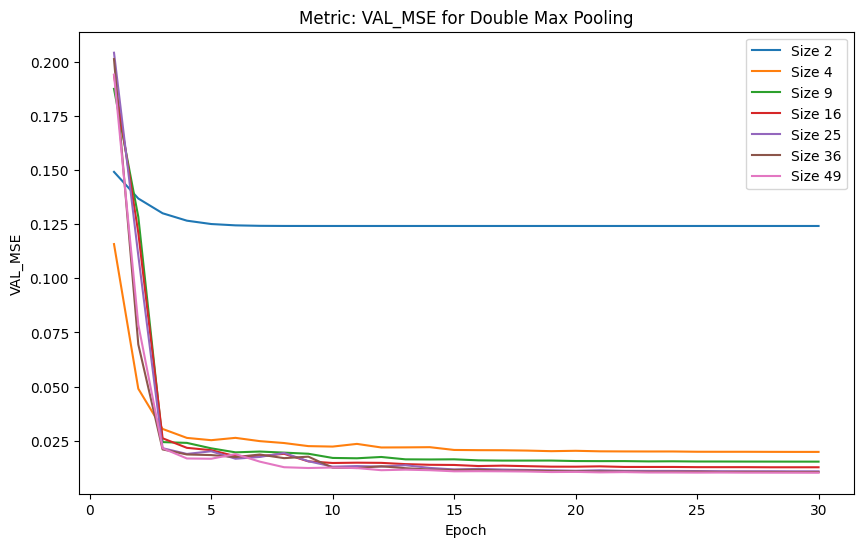

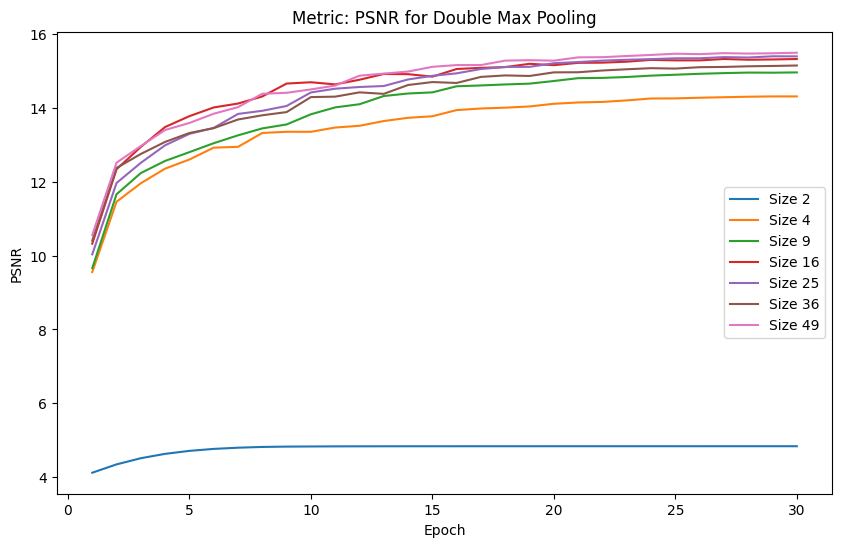

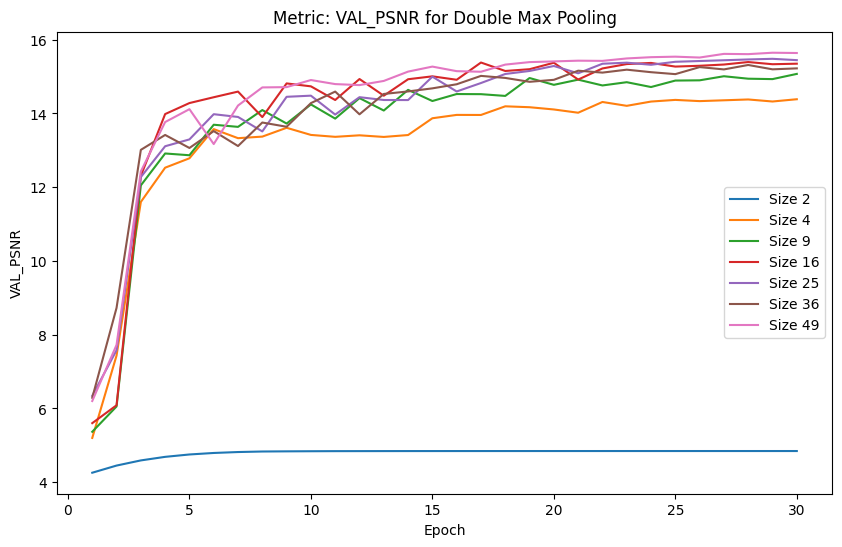

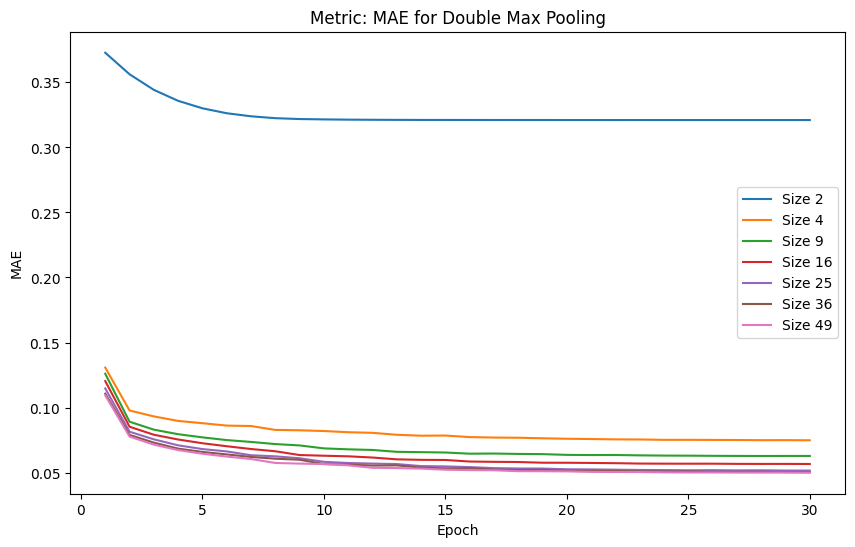

In [27]:
for name, history in histories.items():
    for metric in metric_name:
        plot_metric_for_objects(name, history, metric)